In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,6)
import seaborn as sns
sns.set(style='darkgrid')
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [49]:
path = 'drive/My Drive/Datasets/he_challenge/ml/'

In [50]:
test = pd.read_csv(path+'Test.csv')
train = pd.read_csv(path+'Train.csv')
sample = pd.read_csv(path+'sample_submission.csv')

train.shape, test.shape

((7000, 24), (3000, 23))

In [51]:
target = 'Attrition_rate'
catfeat, numfeat = list(train.select_dtypes(exclude=np.number)), list(train.select_dtypes(include=np.number))
numfeat.remove(target)

df = pd.concat([train,test], keys=['train', 'test'])
df

Employee_ID Gender   Age  ...  VAR6 VAR7 Attrition_rate
train 0      EID_23371      F  42.0  ...     5    3         0.1841
      1      EID_18000      M  24.0  ...     5    3         0.0670
      2       EID_3891      F  58.0  ...     8    3         0.0851
      3      EID_17492      F  26.0  ...     7    3         0.0668
      4      EID_22534      F  31.0  ...     8    2         0.1827
...                ...    ...   ...  ...   ...  ...            ...
test  2995   EID_22547      F  32.0  ...     7    4            NaN
      2996   EID_10066      F   NaN  ...     8    3            NaN
      2997    EID_7126      F  60.0  ...     8    4            NaN
      2998    EID_4929      F  51.0  ...     9    2            NaN
      2999   EID_24750      F  45.0  ...     8    5            NaN

[10000 rows x 24 columns]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, ('train', 0) to ('test', 2999)
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                10000 non-null  object 
 1   Gender                     10000 non-null  object 
 2   Age                        9427 non-null   float64
 3   Education_Level            10000 non-null  int64  
 4   Relationship_Status        10000 non-null  object 
 5   Hometown                   10000 non-null  object 
 6   Unit                       10000 non-null  object 
 7   Decision_skill_possess     10000 non-null  object 
 8   Time_of_service            9804 non-null   float64
 9   Time_since_promotion       10000 non-null  int64  
 10  growth_rate                10000 non-null  int64  
 11  Travel_Rate                10000 non-null  int64  
 12  Post_Level                 10000 non-null  int64  
 13  Pay_Scale                 

In [53]:
## CREATING A TEMPORARY DATAFRAME TO HANDLE MISSING VALUES
temp = pd.concat([df['Age'], df['Time_of_service'], df['Pay_Scale'], df['Work_Life_balance'], df['VAR2'], df['VAR4']], axis=1)
temp.head(20)

Age  Time_of_service  Pay_Scale  Work_Life_balance    VAR2  VAR4
train 0   42.0              4.0        7.0                3.0  0.7516   2.0
      1   24.0              5.0        6.0                4.0 -0.9612   2.0
      2   58.0             27.0        8.0                1.0 -0.9612   3.0
      3   26.0              4.0        8.0                1.0 -1.8176   NaN
      4   31.0              5.0        2.0                3.0  0.7516   2.0
      5   54.0             19.0        9.0                1.0 -1.8176   2.0
      6   21.0              2.0        6.0                2.0 -0.9612   2.0
      7    NaN             34.0        6.0                2.0 -0.1048   2.0
      8   40.0             13.0        9.0                4.0     NaN   2.0
      9   45.0             21.0        5.0                4.0  0.7516   2.0
      10  65.0             31.0        6.0                3.0  0.7516   3.0
      11  19.0              0.0        5.0                1.0 -1.8176   2.0
      12  63.0             27.0        7.0                1.0 -0.1048   2.0
      13  23.0              4.0        8.0                3.0 -0.1048   2.0
      14  19.0              0.0        9.0                3.0 -0.9612   2.0
      15   NaN              0.0        6.0                2.0  0.7516   1.0
      16  65.0             35.0        4.0                2.0 -0.1048   1.0
      17  40.0             12.0        9.0                2.0 -0.9612   2.0
      18  33.0              9.0        5.0                1.0 -1.8176   2.0
      19  32.0              7.0        5.0                1.0     NaN   1.0

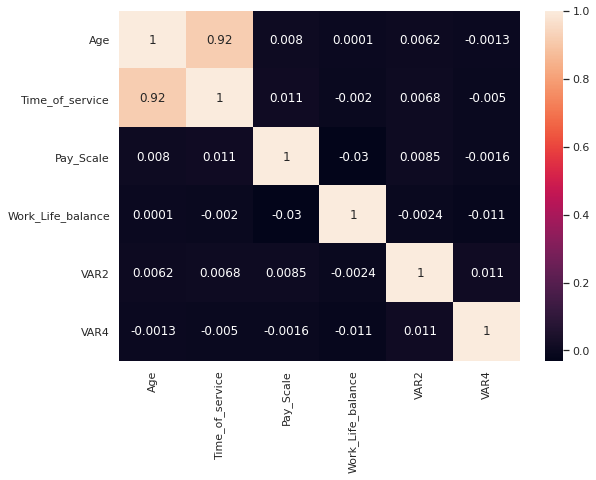

In [54]:
sns.heatmap(temp.corr(), annot = True); plt.show()

In [55]:
temp.isnull().sum()/len(temp)*100

Age                  5.73
Time_of_service      1.96
Pay_Scale            0.12
Work_Life_balance    0.16
VAR2                 7.94
VAR4                 9.54
dtype: float64

In [56]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, ('train', 0) to ('test', 2999)
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                9427 non-null   float64
 1   Time_of_service    9804 non-null   float64
 2   Pay_Scale          9988 non-null   float64
 3   Work_Life_balance  9984 non-null   float64
 4   VAR2               9206 non-null   float64
 5   VAR4               9046 non-null   float64
dtypes: float64(6)
memory usage: 552.8+ KB


In [57]:
print("Skewness:")
print(temp.skew())

Skewness:
Age                  0.228507
Time_of_service      0.785758
Pay_Scale           -0.259408
Work_Life_balance    0.203832
VAR2                -0.445757
VAR4                -0.091472
dtype: float64


In [58]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Time_of_service'].fillna(df['Time_of_service'].median(), inplace=True)
df['Pay_Scale'].fillna(method='ffill', inplace=True)
df['Work_Life_balance'].fillna(df['Work_Life_balance'].median(), inplace=True)
df['VAR2'].fillna(df['VAR2'].median(), inplace=True)
df['VAR4'].fillna(df['VAR4'].median(), inplace=True)

In [59]:
catfeat

['Employee_ID',
 'Gender',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Compensation_and_Benefits']

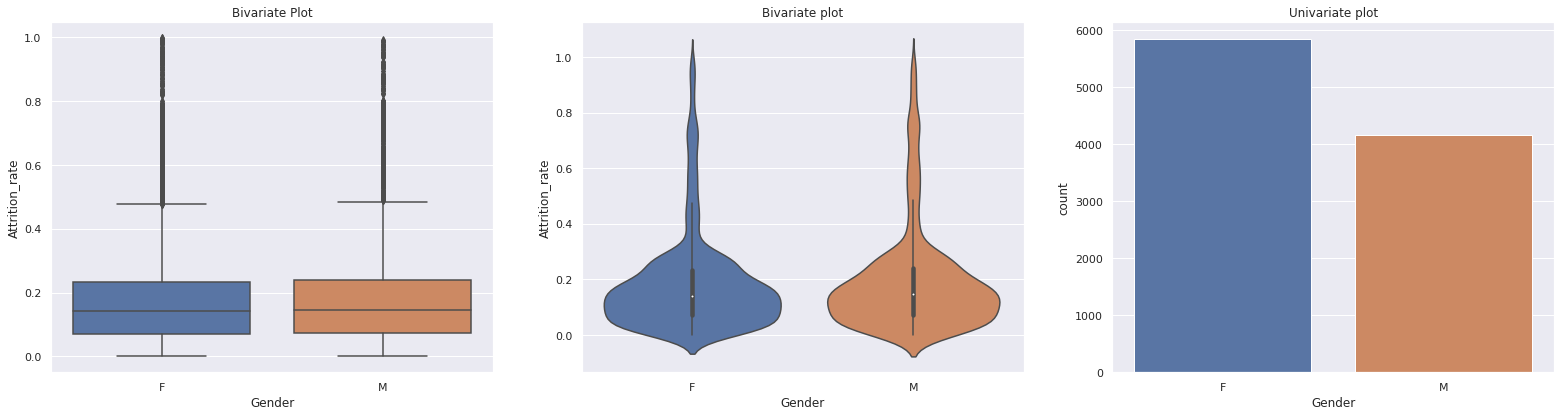

In [60]:
temp=catfeat[1]
f, ax = plt.subplots( 1, 3, figsize=(24,6))
sns.boxplot(x=temp, y=target, data=df, ax=ax[0])
ax[0].set_title('Bivariate Plot')
sns.violinplot(x=temp, y=target, data=df, ax=ax[1])
ax[1].set_title('Bivariate plot')
sns.countplot(df[temp],ax=ax[2])
ax[2].set_title('Univariate plot')
plt.show()

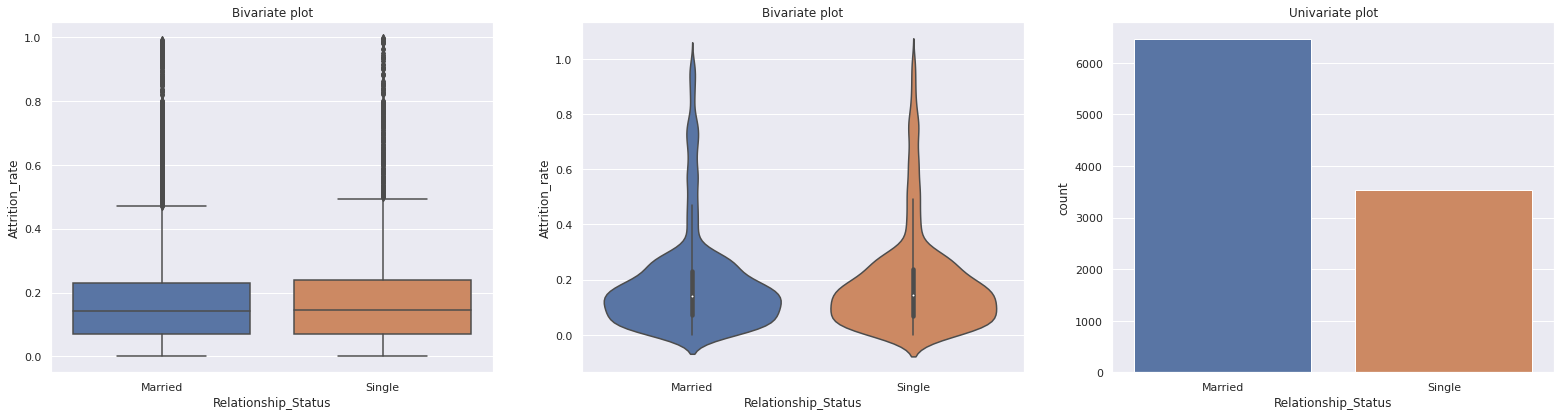

In [61]:
temp = catfeat[2]
f, a = plt.subplots(1,3,figsize=(24,6))
sns.boxplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.violinplot(x=temp, y=target, data=df, ax=a[1])
a[1].set_title('Bivariate plot')
sns.countplot(df[temp],ax=a[2])
a[2].set_title('Univariate plot')
plt.show()

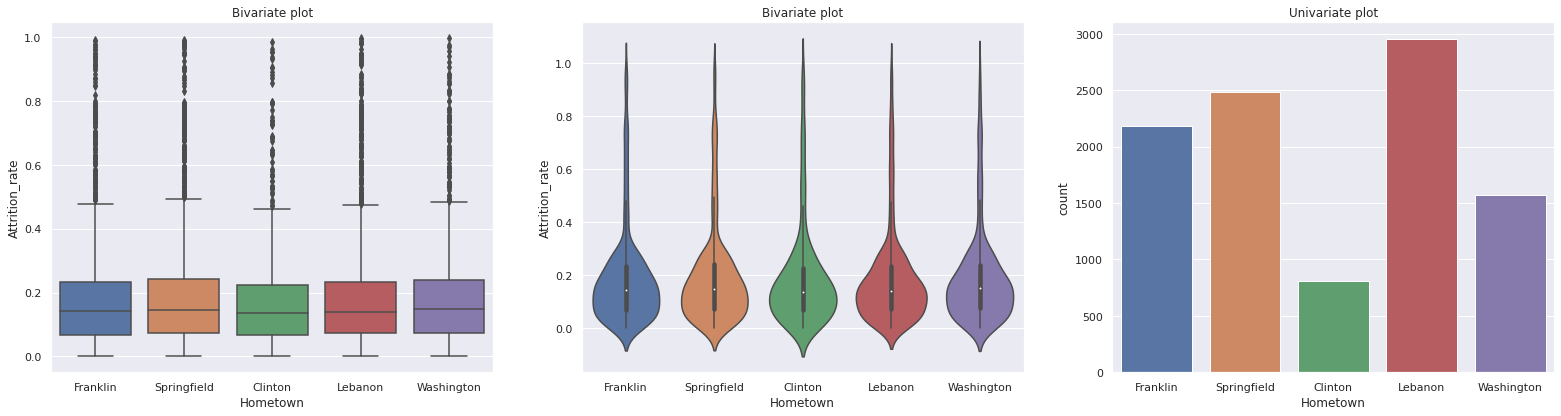

In [62]:
temp = catfeat[3]
f, a = plt.subplots(1,3,figsize=(24,6))
sns.boxplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.violinplot(x=temp, y=target, data=df, ax=a[1])
a[1].set_title('Bivariate plot')
sns.countplot(df[temp],ax=a[2])
a[2].set_title('Univariate plot')
plt.show()

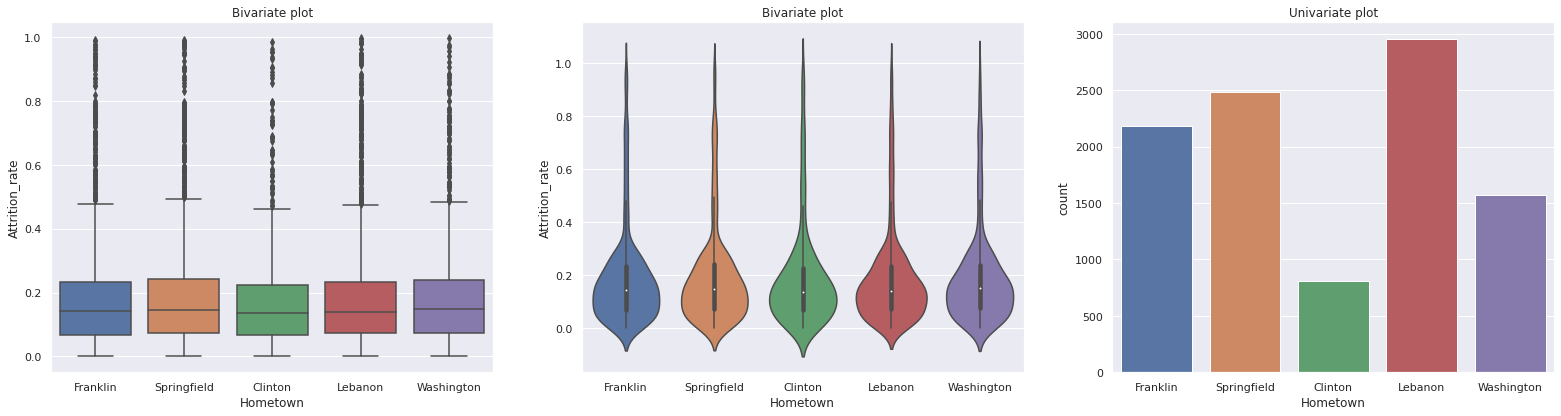

In [63]:
temp = catfeat[3]
f, a = plt.subplots(1,3,figsize=(24,6))
sns.boxplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.violinplot(x=temp, y=target, data=df, ax=a[1])
a[1].set_title('Bivariate plot')
sns.countplot(df[temp],ax=a[2])
a[2].set_title('Univariate plot')
plt.show()

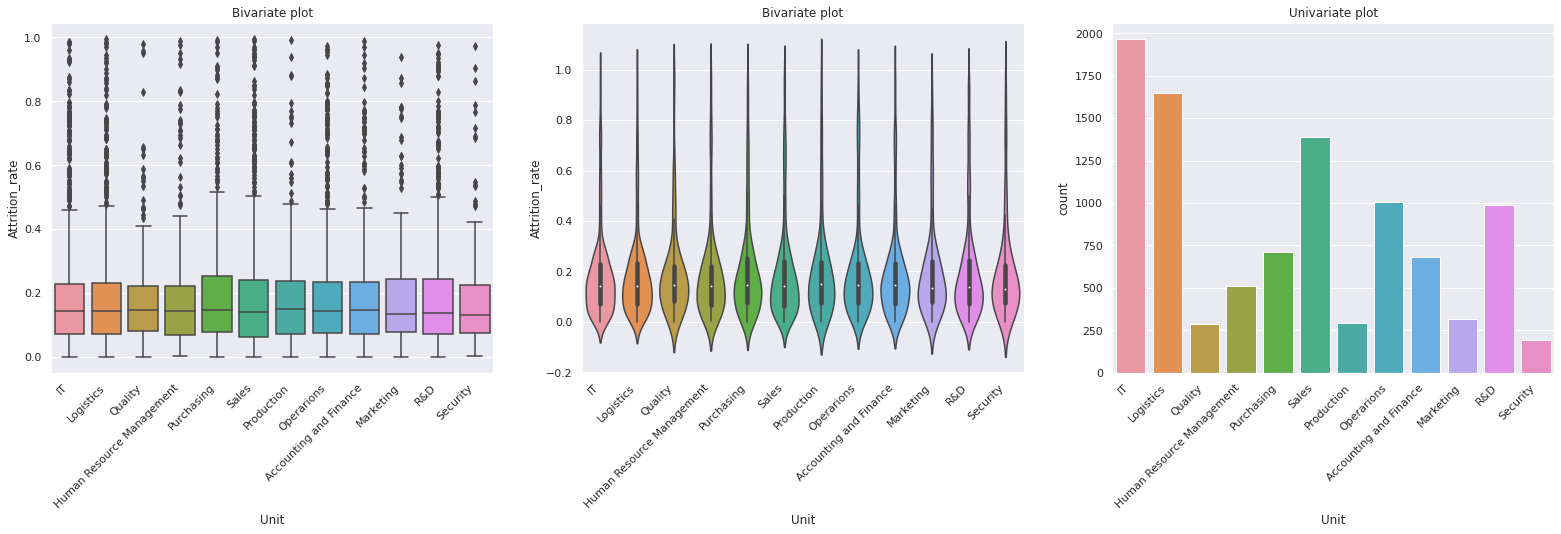

In [64]:
temp = catfeat[4]
f, a = plt.subplots(1,3,figsize=(24,6))
sns.boxplot(x=temp, y=target, data=df,ax=a[0]).set_xticklabels(list(df[temp].unique()), rotation=45, horizontalalignment='right')
a[0].set_title('Bivariate plot')
sns.violinplot(x=temp, y=target, data=df, ax=a[1]).set_xticklabels(list(df[temp].unique()), rotation=45, horizontalalignment='right')
a[1].set_title('Bivariate plot')
sns.countplot(df[temp],ax=a[2]).set_xticklabels(list(df[temp].unique()), rotation=45, horizontalalignment='right')
a[2].set_title('Univariate plot')
plt.show()

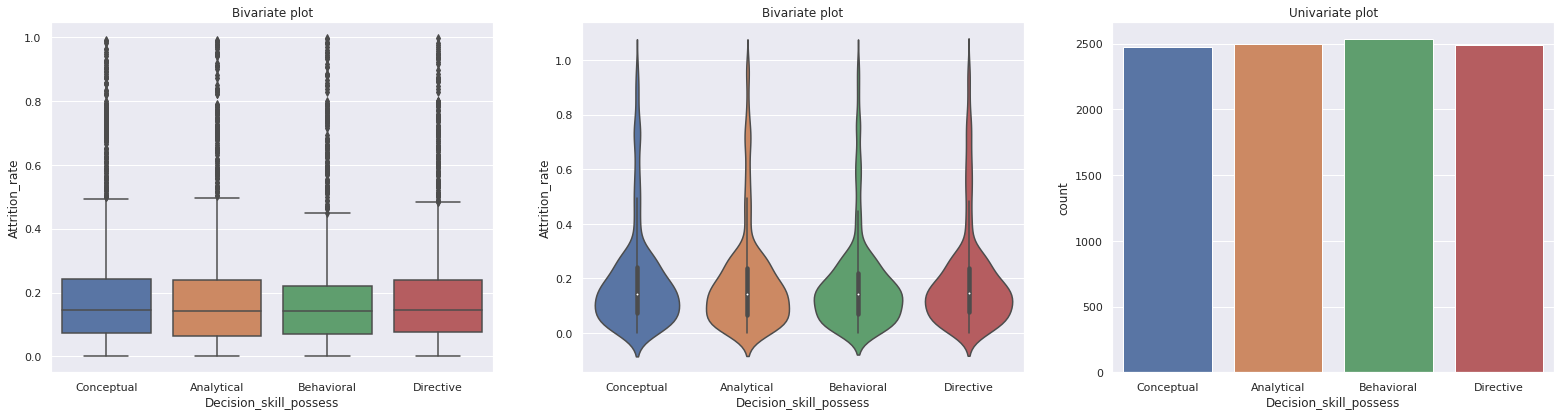

In [65]:
temp = catfeat[5]
f, a = plt.subplots(1,3,figsize=(24,6))
sns.boxplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.violinplot(x=temp, y=target, data=df, ax=a[1])
a[1].set_title('Bivariate plot')
sns.countplot(df[temp],ax=a[2])
a[2].set_title('Univariate plot')
plt.show()

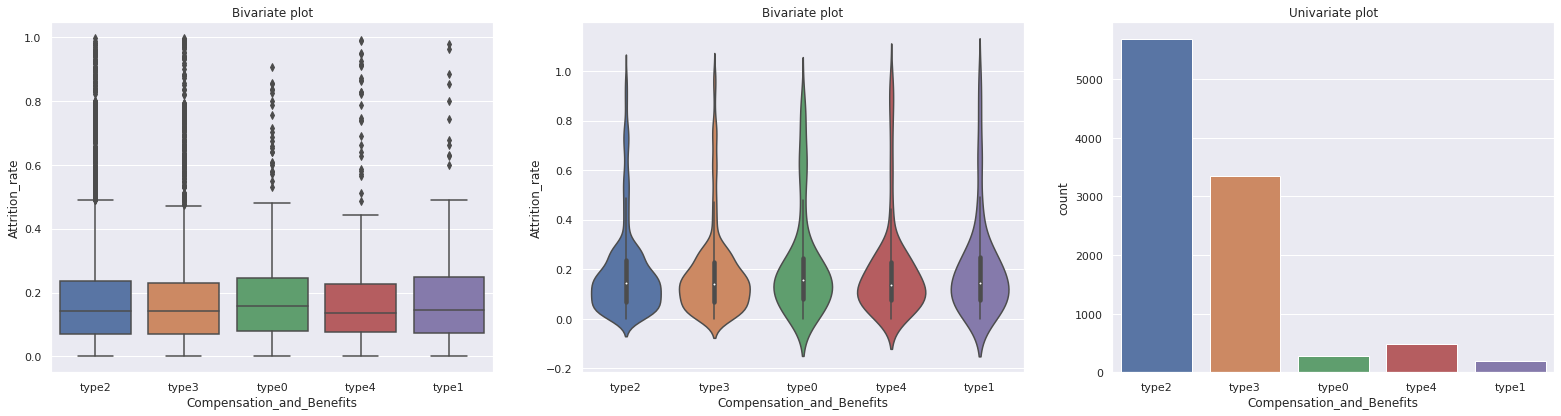

In [66]:
temp = catfeat[6]
f, a = plt.subplots(1,3,figsize=(24,6))
sns.boxplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.violinplot(x=temp, y=target, data=df, ax=a[1])
a[1].set_title('Bivariate plot')
sns.countplot(df[temp],ax=a[2])
a[2].set_title('Univariate plot')
plt.show()

In [67]:
print(numfeat)

['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']


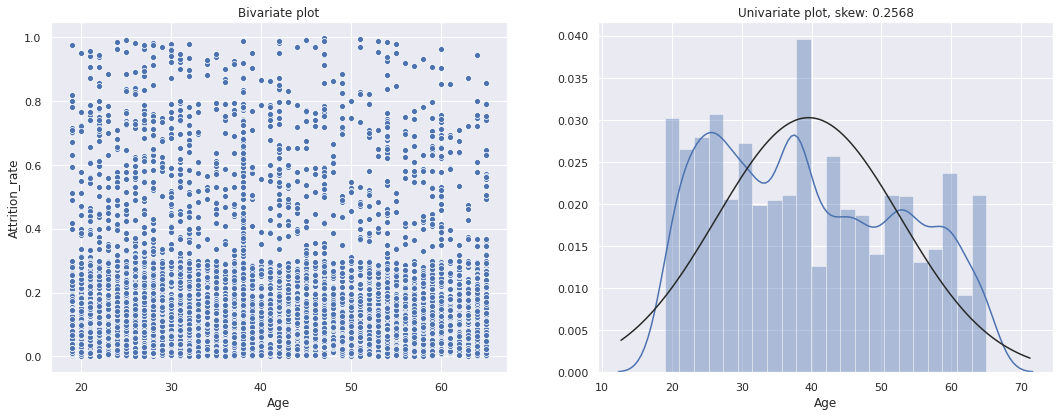

In [68]:
temp=numfeat[0]
f,a=plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=temp, y=target, data=df, ax=a[0])
a[0].set_title('Bivariate plot')
sns.distplot(df[temp],ax=a[1],fit=stats.norm)
a[1].set_title('Univariate plot, skew: {:.4f}'.format(df[temp].skew()))
plt.show()

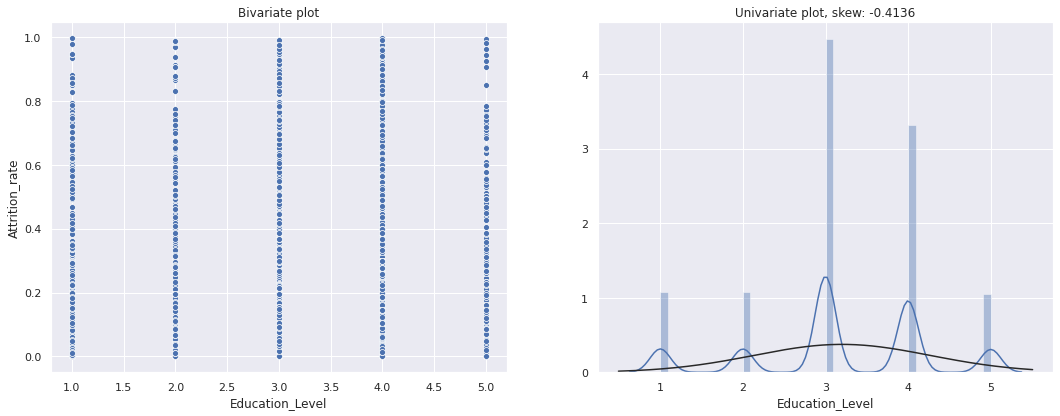

In [69]:
temp = numfeat[1]
f, a = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.distplot(df[temp],ax=a[1],fit=stats.norm)
a[1].set_title('Univariate plot, skew: {:.4f}'.format(df[temp].skew()))
plt.show()

In [70]:
df[numfeat[1]] = df[numfeat[1]].astype('str')

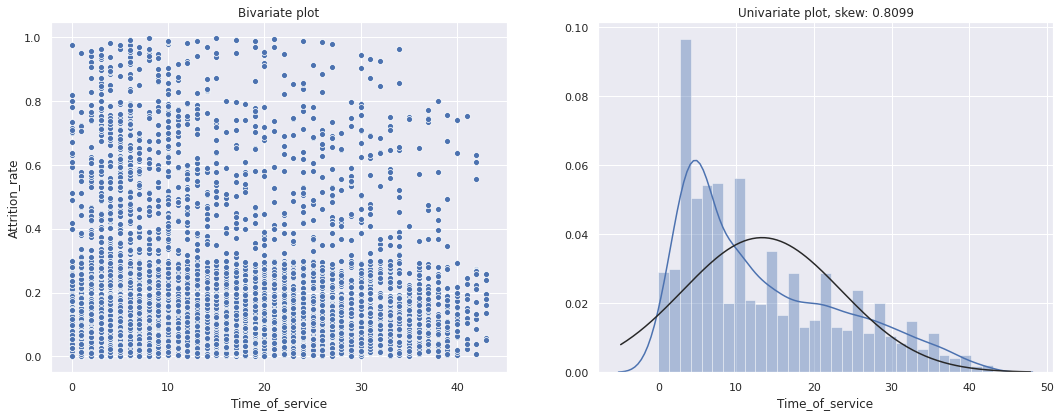

In [71]:
temp=numfeat[2]
f, a = plt.subplots(1, 2, figsize=( 16, 6 ))
sns.scatterplot(x=temp, y=target, data=df, ax=a[0])
a[0].set_title('Bivariate plot')
sns.distplot(df[temp],ax=a[1],fit=stats.norm)
a[1].set_title('Univariate plot, skew: {:.4f}'.format(df[temp].skew()))
plt.show()

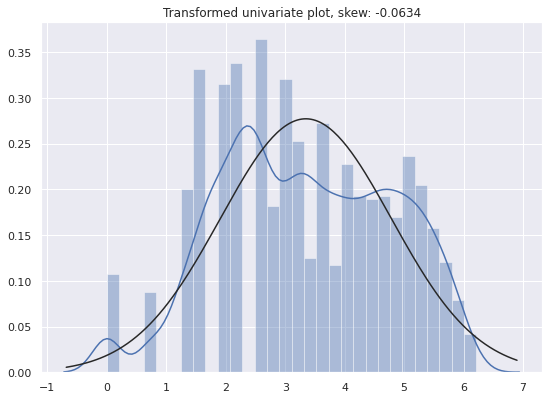

In [72]:
trans = stats.boxcox(1+df[temp], stats.boxcox_normmax(1+df[temp]))
sns.distplot(trans, fit = stats.norm)
plt.title('Transformed univariate plot, skew: {:.4f}'.format(pd.Series(trans).skew()))
df[temp] = stats.boxcox(1+df[temp], stats.boxcox_normmax(1+df[temp]))
plt.show()

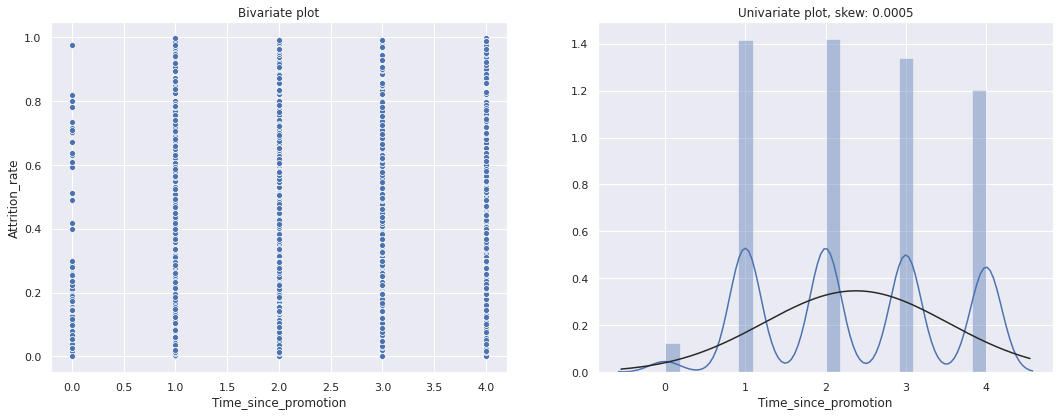

In [73]:
temp = numfeat[3]
f, a = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.distplot(df[temp],ax=a[1],fit=stats.norm)
a[1].set_title('Univariate plot, skew: {:.4f}'.format(df[temp].skew()))
plt.show()

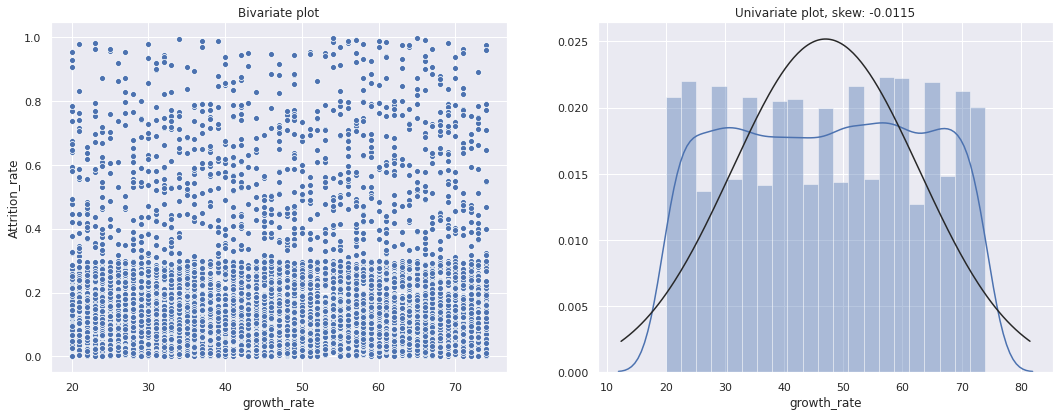

In [74]:
temp = numfeat[4]
f, a = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.distplot(df[temp],ax=a[1],fit=stats.norm)
a[1].set_title('Univariate plot, skew: {:.4f}'.format(df[temp].skew()))
plt.show()

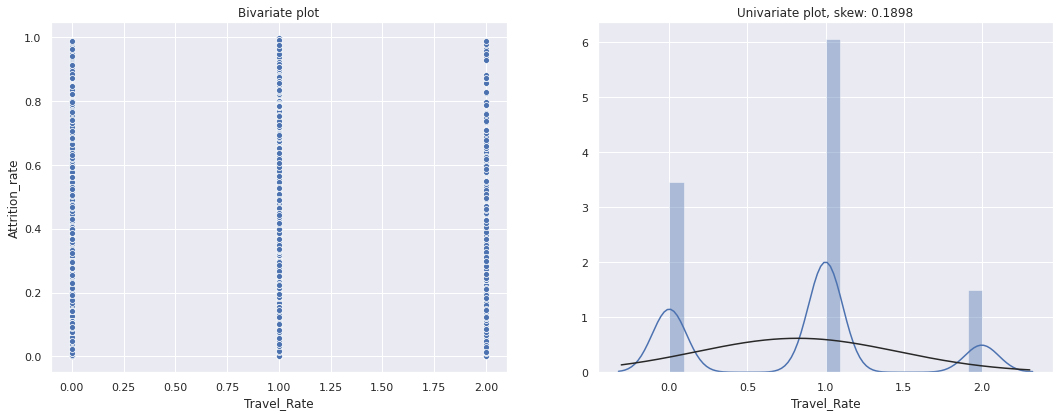

In [75]:
temp = numfeat[5]
f, a = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.distplot(df[temp],ax=a[1],fit=stats.norm)
a[1].set_title('Univariate plot, skew: {:.4f}'.format(df[temp].skew()))
plt.show()

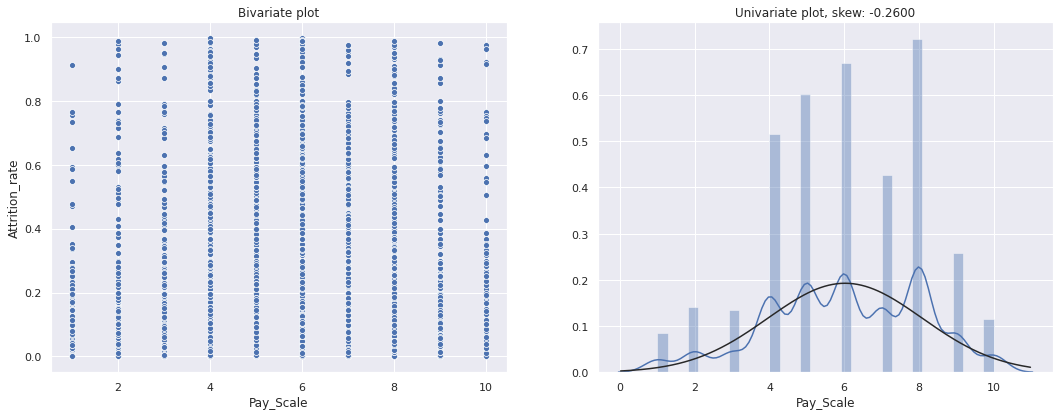

In [76]:
temp = numfeat[7]
f, a = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.distplot(df[temp],ax=a[1],fit=stats.norm)
a[1].set_title('Univariate plot, skew: {:.4f}'.format(df[temp].skew()))
plt.show()

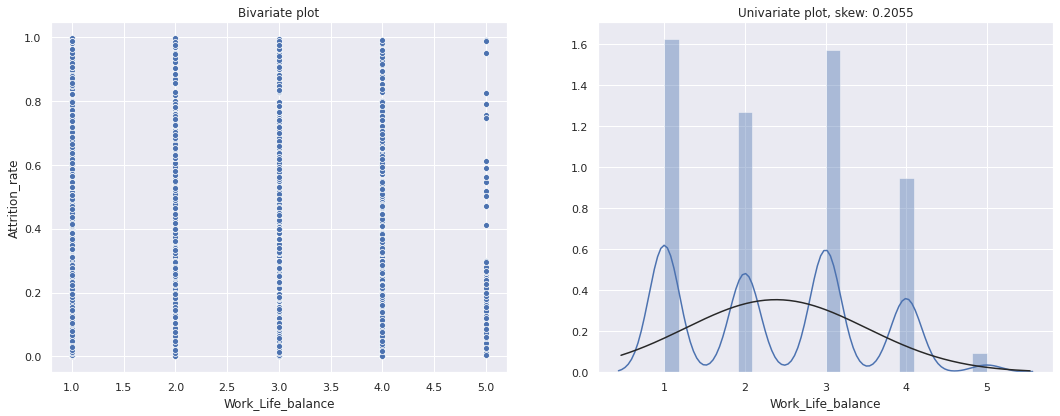

In [77]:

temp = numfeat[8]
f, a = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.distplot(df[temp],ax=a[1],fit=stats.norm)
a[1].set_title('Univariate plot, skew: {:.4f}'.format(df[temp].skew()))
plt.show()

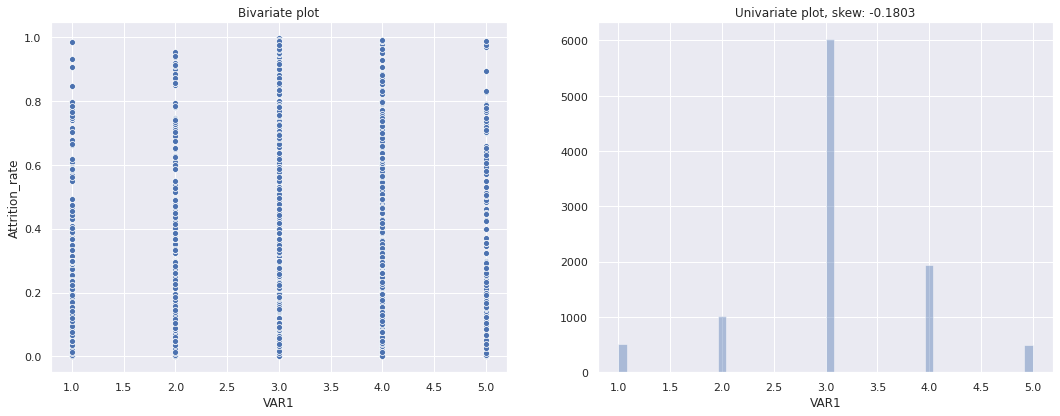

In [78]:
temp = numfeat[9]
f, a = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.distplot(df[temp],ax=a[1], kde=False)
a[1].set_title('Univariate plot, skew: {:.4f}'.format(df[temp].skew()))
plt.show()

In [79]:
## FEATURE HAS BEEN MISCLASSIFIED AS NUMERIC. CONVERTING TO CATEGORICAL FEATURE
df[numfeat[9]] = df[numfeat[9]].astype('str')

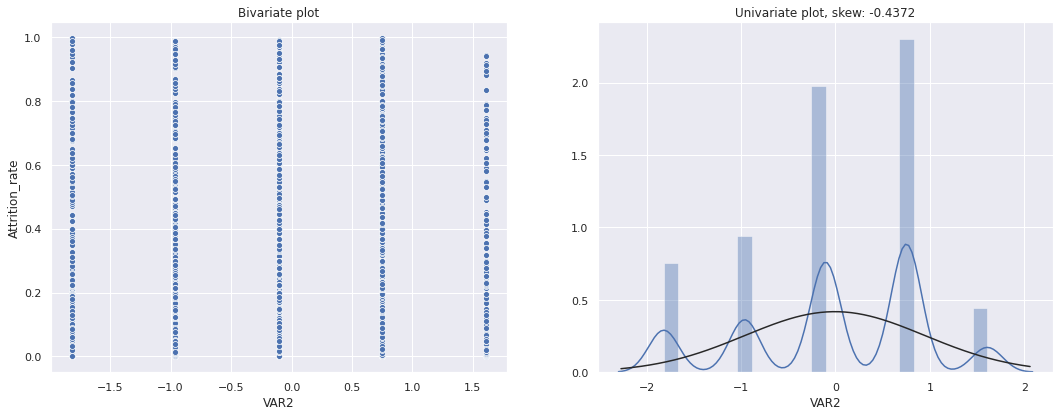

In [80]:
temp = numfeat[10]
f, a = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.distplot(df[temp],ax=a[1],fit=stats.norm)
a[1].set_title('Univariate plot, skew: {:.4f}'.format(df[temp].skew()))
plt.show()

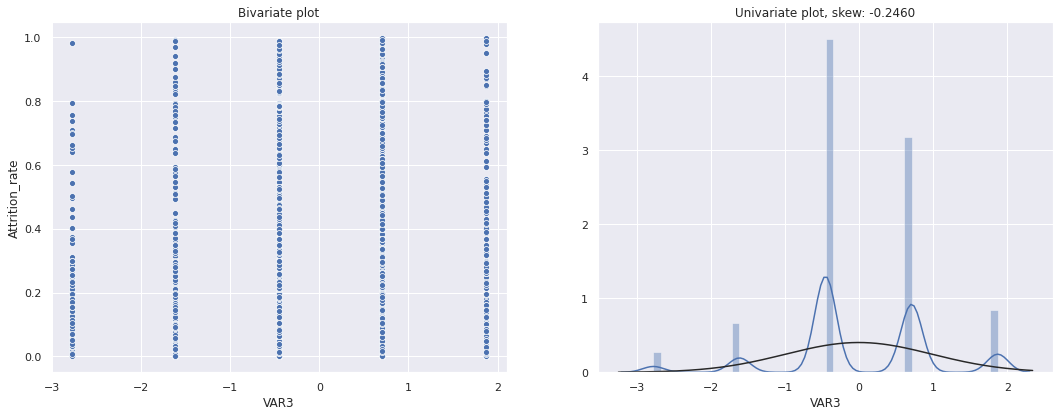

In [81]:
temp = numfeat[11]
f, a = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.distplot(df[temp],ax=a[1],fit=stats.norm)
a[1].set_title('Univariate plot, skew: {:.4f}'.format(df[temp].skew()))
plt.show()

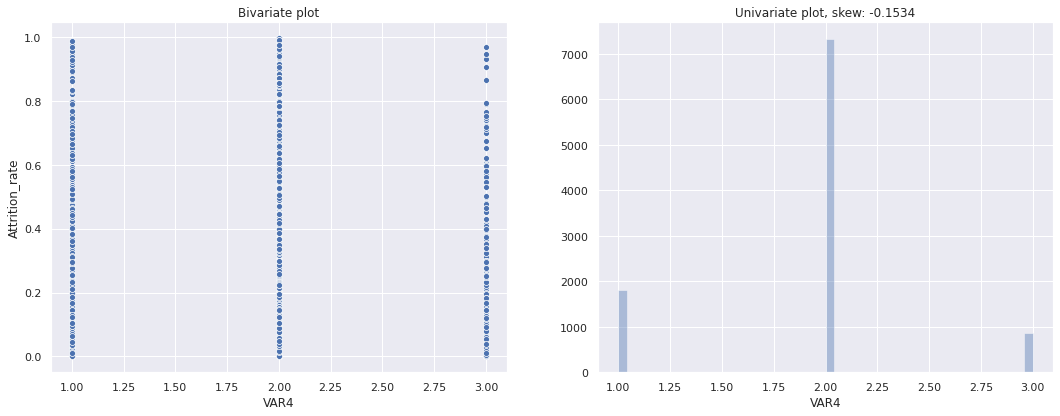

In [82]:
temp = numfeat[12]
f, a = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.distplot(df[temp],ax=a[1],kde=False)
a[1].set_title('Univariate plot, skew: {:.4f}'.format(df[temp].skew()))
plt.show()

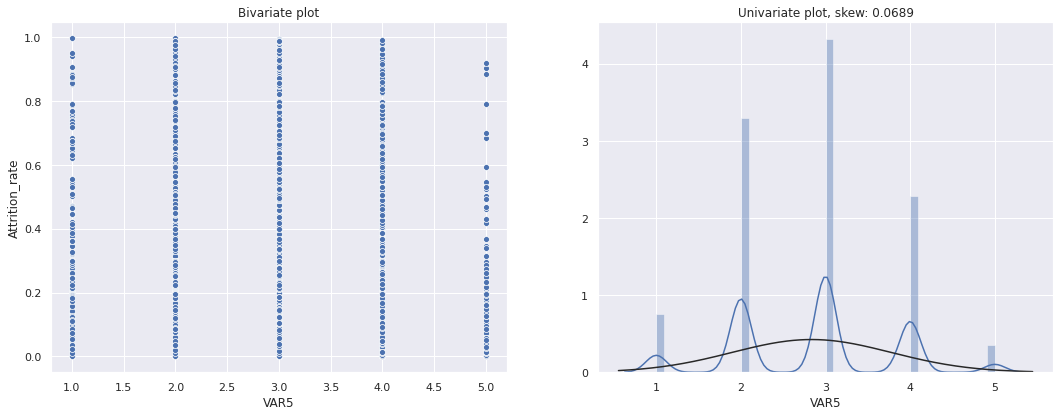

In [83]:
temp = numfeat[13]
f, a = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=temp, y=target, data=df,ax=a[0])
a[0].set_title('Bivariate plot')
sns.distplot(df[temp],ax=a[1],fit=stats.norm)
a[1].set_title('Univariate plot, skew: {:.4f}'.format(df[temp].skew()))
plt.show()

In [84]:
df.describe()

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,7000.000000
mean,39.579500,3.346543,2.37860,47.008400,0.820700,2.797000,6.022400,2.385200,-0.005879,-0.005826,1.905900,2.834800,7.110000,3.249600,0.189376
std,13.185912,1.439233,1.14978,15.848553,0.646524,1.171037,2.070296,1.127984,0.953152,0.990812,0.508794,0.939466,1.160877,0.918795,0.185753
min,19.000000,0.000000,0.00000,20.000000,0.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,28.000000,2.246607,1.00000,33.000000,0.000000,2.000000,5.000000,1.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,38.000000,3.257356,2.00000,47.000000,1.000000,3.000000,6.000000,2.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,51.000000,4.513578,3.00000,61.000000,1.000000,4.000000,8.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,6.215492,4.00000,74.000000,2.000000,5.000000,10.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

catfeat, numfeat=list(train.select_dtypes(exclude=np.number)), list(train.select_dtypes(include=np.number))
numfeat.remove(target)

df[numfeat]=scaler.fit_transform(df[numfeat])

In [86]:
df.drop('Employee_ID', axis=1, inplace=True)
df1 = pd.get_dummies(df)

In [87]:
df1.head()

Age  ...  Compensation_and_Benefits_type4
train 0  0.500000  ...                                0
      1  0.108696  ...                                0
      2  0.847826  ...                                0
      3  0.152174  ...                                0
      4  0.260870  ...                                0

[5 rows x 47 columns]

In [88]:
x, y, X_test = df1.xs('train').drop(target, axis=1), df1.xs('train')[target], df1.xs('test').drop(target, axis=1)
x.shape, y.shape, X_test.shape

((7000, 46), (7000,), (3000, 46))

In [89]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)

x_pca=pca.fit_transform(x)
X_test_pca = pca.fit_transform(X_test)
x_pca, X_test_pca= pd.DataFrame(x_pca),pd.DataFrame(X_test_pca) 
x_pca.shape, X_test_pca.shape

((7000, 3), (3000, 3))

In [90]:
## A dictionary to store scores of models
scoresd = dict()

In [92]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold

kf = KFold(n_splits=15,shuffle = True, random_state=100)
parameters= {'alpha':[0.0001,0.0009,0.001,0.01,0.1,1,10],
            'max_iter':[100,500,1000, 50, 20]
             }


lasso = Lasso()
lasso_model = GridSearchCV(lasso, param_grid=parameters, cv=10)
lasso_model.fit(x,y)

print('The best value of Alpha is: ',lasso_model.best_params_)

The best value of Alpha is:  {'alpha': 0.001, 'max_iter': 100}


In [95]:
lss, scores=Lasso(alpha=0.01, max_iter=100), list()

for train, test in kf.split(x,y):
  x_train, y_train = x.loc[train], y.loc[train]
  x_test, y_test = x.loc[test], y.loc[test]

  lss.fit(x_train, y_train)
  y_pred=lss.predict(x_test)

  temp = mean_squared_error(y_pred,y_test)
  scores.append(100*max(0,1-np.sqrt(temp)))

scoresd['lasso'] = sum(scores)/len(scores)
print('CV(', kf.get_n_splits(), ') score: ', scoresd['lasso'])

CV( 15 ) score:  81.45757915240748


In [96]:
import lightgbm as lgb

lgbmodel, scores=lgb.LGBMRegressor(), list()
for train, test in kf.split(x,y):
    x_train, y_train = x.loc[train], y.loc[train]
    x_test, y_test = x.loc[test], y.loc[test]

    lgbmodel.fit(x_train,y_train, early_stopping_rounds=100, verbose=False, eval_metric='mean_squared_error', eval_set=(x_test,y_test))
    y_pred = lgbmodel.predict(x_test)
    
    temp = mean_squared_error(y_pred,y_test)
    scores.append(100*max(0,1-(np.sqrt(temp))))

scoresd['baseline_lgb'] = sum(scores)/len(scores)
print('CV(', kf.get_n_splits(), ') score: ', scoresd['baseline_lgb'])

CV( 15 ) score:  81.49973502929377


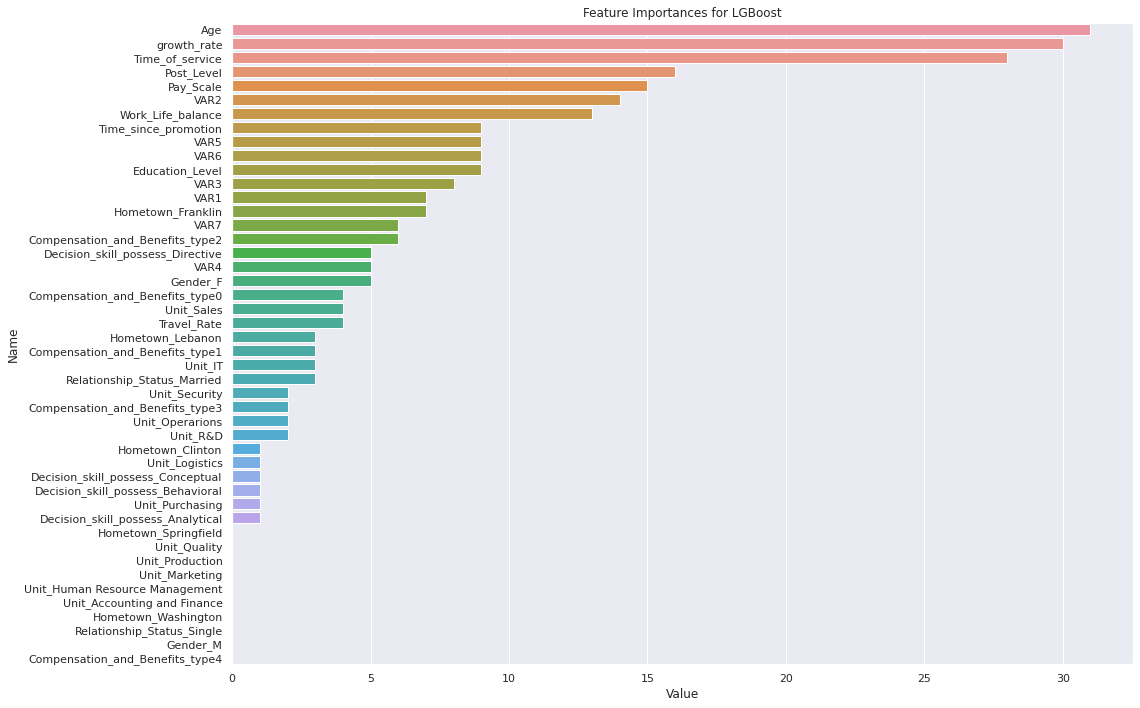

In [97]:
imp = pd.concat([pd.Series(lgbmodel.feature_importances_), pd.Series(list(x.columns))], keys = ['Value', 'Name'], axis=1)

plt.figure(figsize=(16,10))
sns.barplot(x='Value', y='Name', data= imp.sort_values(by='Value', ascending=False))
plt.title('Feature Importances for LGBoost')
plt.tight_layout()

In [99]:
from sklearn.model_selection import RandomizedSearchCV

learning_rate = [float(x) for x in np.linspace(0.005, 0.05, 100)]
n_estimators = [int(x) for x in range(500,5000,100)]
max_depth = [int(x) for x in range(2,30,2)]
num_leaves = [int(x) for x in range(1,5000,100)]
bagging_fraction = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

early_stopping_rounds = 50
min_data_in_leaf = 100
lambda_l1 = 0.5

lgbgrid = {'num_leaves': num_leaves,
           'bagging_fraction': bagging_fraction,
           'max_depth': max_depth,
           'n_estimators': n_estimators,
           'learning_rate': learning_rate
           }

lgbm = lgb.LGBMRegressor(min_data_in_leaf=min_data_in_leaf, lambda_l1=lambda_l1)
reg = RandomizedSearchCV(lgbm, lgbgrid, cv=5, n_iter=300, n_jobs=-1)
search = reg.fit(x,y)
search.best_params_

KeyboardInterrupt: ignored

In [100]:
lgbmodelfixed, scores= lgb.LGBMRegressor(num_leaves=3801, n_estimators=600, max_depth=2, learning_rate=0.02363636363636364, bagging_fraction=0.6), list()


kf = KFold(n_splits=15,shuffle = True, random_state=100)

for train, test in kf.split(x_pca,y):
    x_train, y_train = x.loc[train], y.loc[train]
    x_test, y_test = x.loc[test], y.loc[test]

    lgbmodelfixed.fit(x_train,y_train, early_stopping_rounds=100, verbose=False, eval_metric='mean_squared_error', eval_set=(x_test,y_test))
    y_pred = lgbmodelfixed.predict(x_test)
    
    temp = mean_squared_error(y_pred,y_test)
    scores.append(100*max(0,1-(np.sqrt(temp))))

scoresd['pca_tuned_lgb'] = sum(scores)/len(scores)
print('CV(', kf.get_n_splits(), ') score: ', scoresd['pca_tuned_lgb'])

CV( 15 ) score:  81.46246546614557


In [101]:
import xgboost as xgb

xgbmodel, scores = xgb.XGBRegressor(), list()

for train, test in kf.split(x,y):
    x_train, y_train = x.loc[train], y.loc[train]
    x_test, y_test = x.loc[test], y.loc[test]

    xgbmodel.fit(x_train,y_train, verbose=False)
    y_pred = xgbmodel.predict(x_test)

    temp = mean_squared_error(y_pred,y_test)
    scores.append(100*max(0,1-np.sqrt(temp)))
    
scoresd['baseline_XGB'] = sum(scores)/len(scores)
print('CV(', kf.get_n_splits(), ') score: ', scoresd['baseline_XGB'])

[06:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:44:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:44:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:44:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:44:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [103]:
pip install catboost

     |████████████████████████████████| 64.8MB 61kB/s 


In [104]:
from catboost import CatBoostRegressor

cbr, scores = CatBoostRegressor(learning_rate=0.01), list()

for train, test in kf.split(x,y):
    x_train, y_train = x.loc[train], y.loc[train]
    x_test, y_test = x.loc[test], y.loc[test]

    cbr.fit(x_train,y_train, early_stopping_rounds=100, verbose=False)
    y_pred = cbr.predict(x_test)
    
    temp = mean_squared_error(y_pred,y_test)
    scores.append(100*max(0,1-(np.sqrt(temp))))

scoresd['catboost'] = sum(scores)/len(scores)
print('CV(', kf.get_n_splits(), ') score: ', scoresd['catboost'])

CV( 15 ) score:  81.39238520694703


In [105]:
scoresd

{'baseline_XGB': 81.32023245529471,
 'baseline_lgb': 81.49973502929377,
 'catboost': 81.39238520694703,
 'lasso': 81.45757915240748,
 'pca_tuned_lgb': 81.46246546614557}

In [106]:
lss.fit(x,y)
lgbmodelfixed.fit(x,y)

lgb_Y_pred = lgbmodelfixed.predict(X_test)
lasso_Y_pred = lss.predict(X_test)

Y_pred = 0.60*lgb_Y_pred + 0.40*lasso_Y_pred
Y_pred.shape

(3000,)

In [108]:
test = pd.read_csv(path+'Test.csv')
sample = pd.concat([test['Employee_ID'], pd.Series(np.round(Y_pred, 2))], keys = ('Employee_ID', target), axis=1)
sample.to_csv(path+'blend.csv', index=False)